In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
df=pd.read_csv("HR-Employee-Attrition.csv")

In [20]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,2,1,1,2,Female,94,...,1,80,0,8,0,1,6,4,0,5
1,49,No,279,8,1,1,2,3,Male,61,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1373,2,2,1,4,4,Male,92,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1392,3,4,1,5,4,Female,56,...,3,80,0,8,3,3,8,7,3,0
4,27,No,591,2,1,1,7,1,Male,40,...,4,80,1,6,3,3,2,2,2,2


In [21]:
df.shape

(1470, 28)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EmployeeCount             1470 non-null   int64 
 6   EmployeeNumber            1470 non-null   int64 
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobSatisfaction           1470 non-null   int64 
 13  MonthlyIncome             1470 non-null   int64 
 14  MonthlyRate             

In [23]:
df['Gender']=df['Gender'].map({'Female' : 1, 
                                 'Male' : 0})

In [24]:
df['Attrition']=df['Attrition'].map({
                                 'Yes' : 1, 
                                 'No' : 0})

In [25]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [26]:
x=df.drop(["Attrition"], axis=1)
y=df['Attrition']

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
y_pred=rf.predict(x_test)

In [30]:
print("Accuracy",accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy 0.8775510204081632
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion matrix: 
 [[254   1]
 [ 35   4]]


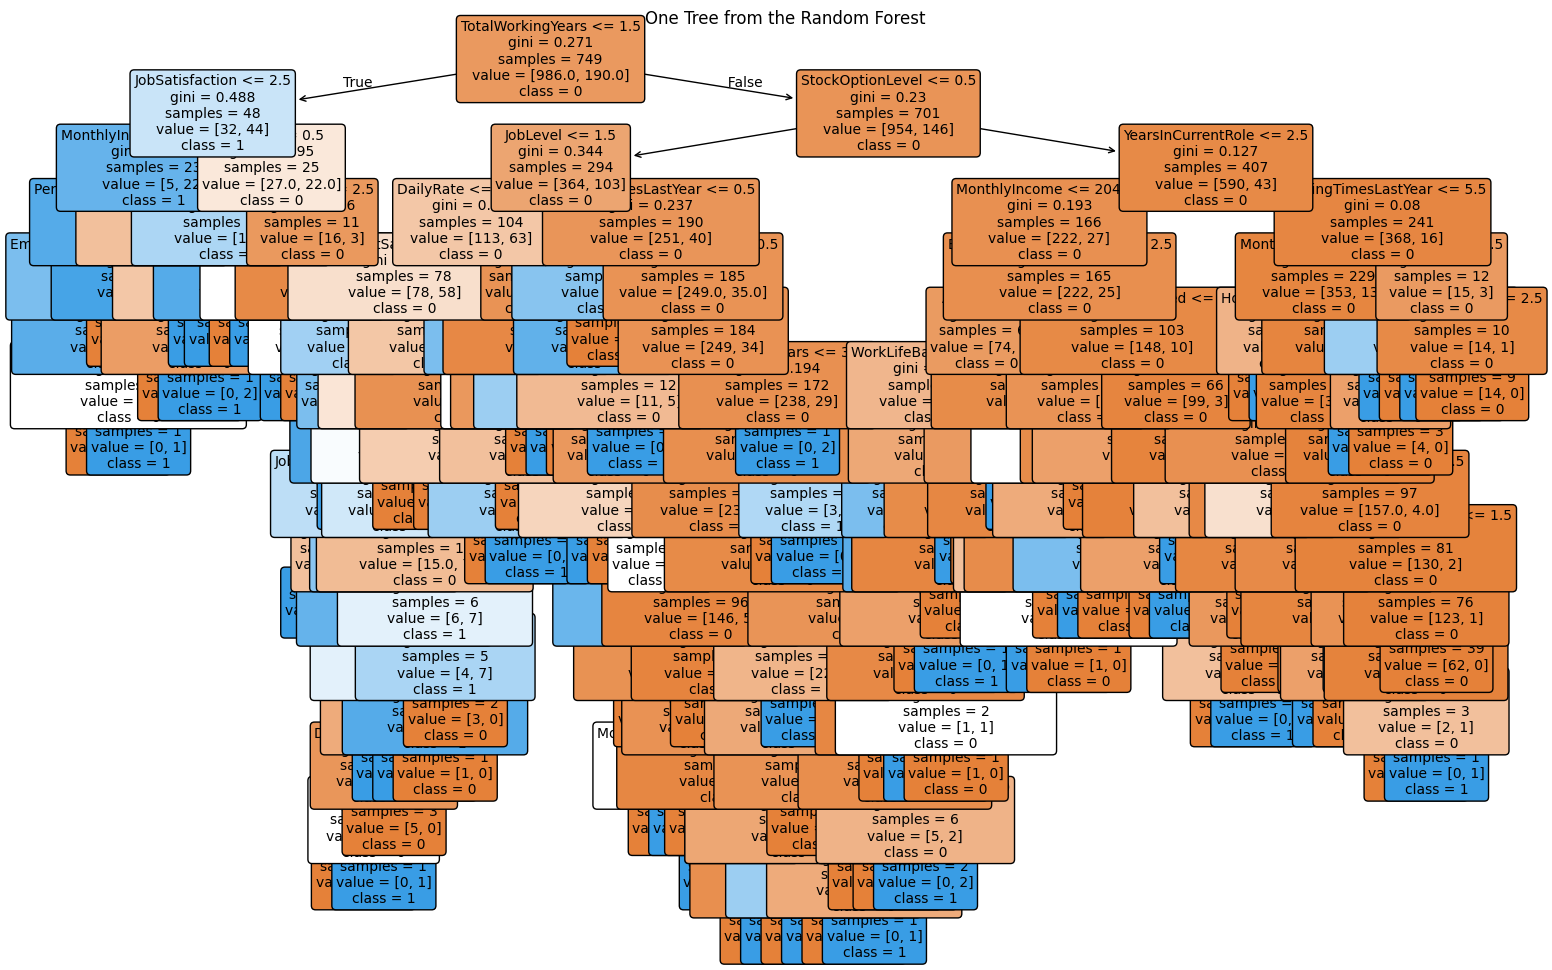

In [31]:
plt.figure(figsize=(18, 12))
tree.plot_tree(rf.estimators_[0],
               feature_names=x.columns.tolist(), 
               class_names=[str(c) for c in rf.classes_],
               filled=True,rounded=True,fontsize=10
               )
plt.title("One Tree from the Random Forest")
plt.show()